# Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:/Users/baner/Downloads/InfosysInternship/complete_dataset.csv")

# Loading the dataset

In [6]:
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


# Generating Information about the dataset

In [7]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB
None


In [8]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


# Checking for null values

In [9]:
print(df.isnull().sum())

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64


In [10]:
df.duplicated().sum()

0

In [11]:
df["date"] = pd.to_datetime(df["date"])

# Filling the null values in solar_exposure and rainfall with the median values

In [12]:
df["solar_exposure"].fillna(df["solar_exposure"].median(), inplace=True)
df["rainfall"].fillna(df["rainfall"].median(), inplace=True)

# Encoding school_day and holiday (categorical values) into 0 and 1

In [13]:
df["school_day"] = df["school_day"].map({"Y": 1, "N": 0})
df["holiday"] = df["holiday"].map({"Y": 1, "N": 0})

# Cleaning the dataset by removing outliers for better visualization and clarity

In [14]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df = remove_outliers(df, "demand")
df = remove_outliers(df, "RRP")
df['school_day'] = df['school_day'].astype(int)

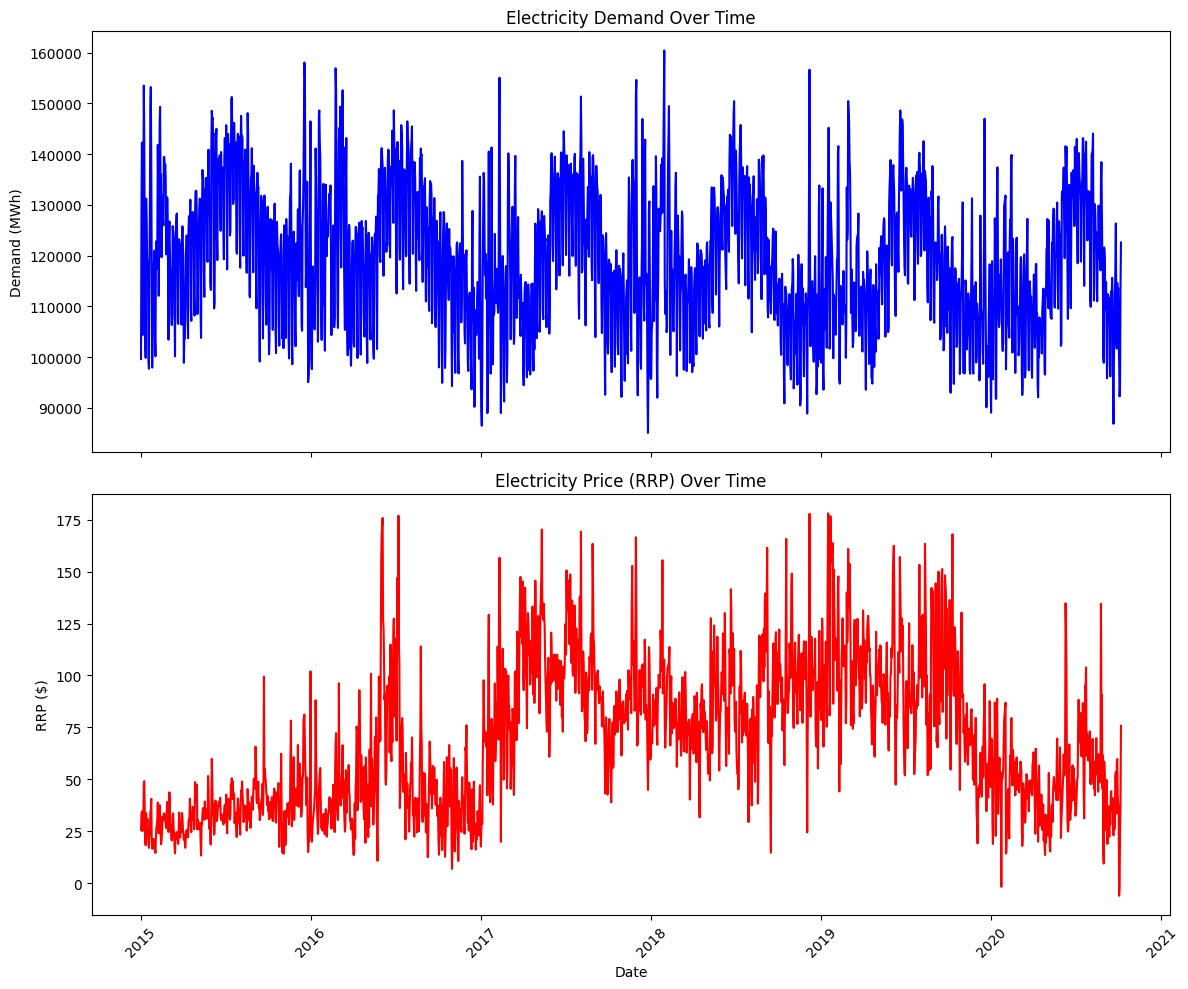

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

sns.lineplot(x=df["date"], y=df["demand"], ax=axes[0], color="blue")
axes[0].set_title("Electricity Demand Over Time")
axes[0].set_ylabel("Demand (MWh)")

sns.lineplot(x=df["date"], y=df["RRP"], ax=axes[1], color="red")
axes[1].set_title("Electricity Price (RRP) Over Time")
axes[1].set_ylabel("RRP ($)")

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The demand for electricity increases and fluctuates over time, showing seasonal patterns.
# The RRP (electricity price) also exhibits fluctuations, spiking the most during the year 2017-2020. This suggests a strong demand during that year, possibly influenced by supply constraints.

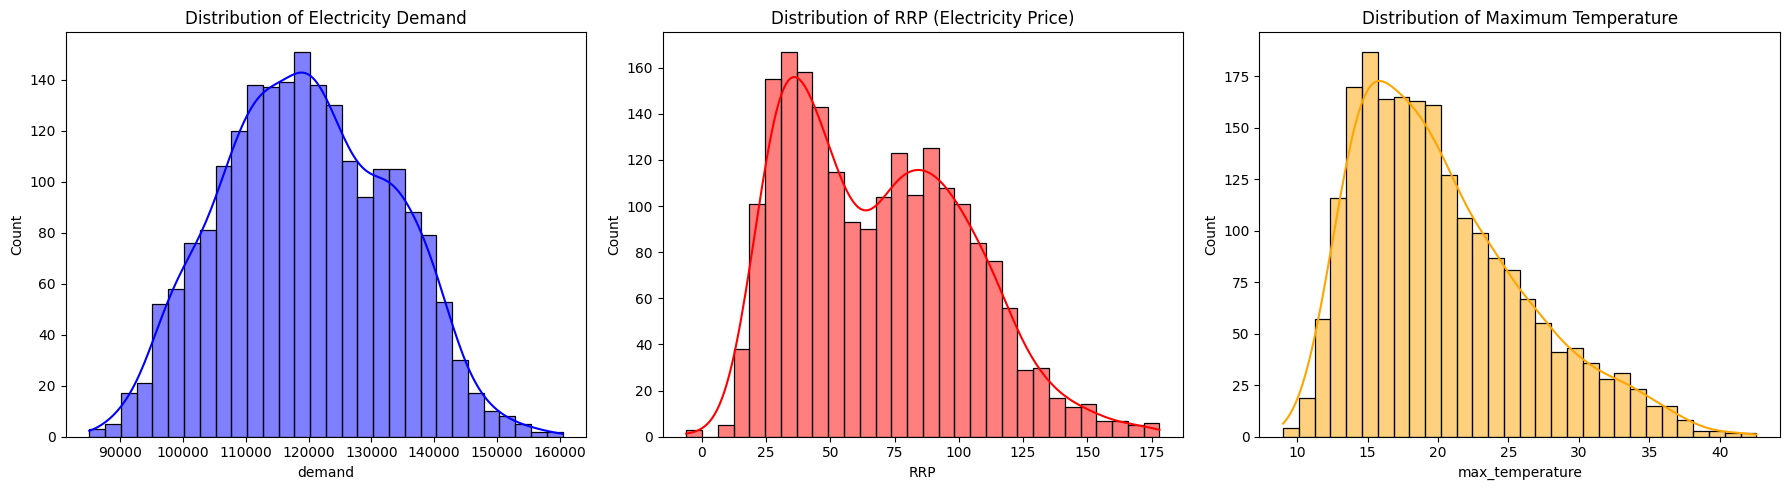

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["demand"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Electricity Demand")

sns.histplot(df["RRP"], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title("Distribution of RRP (Electricity Price)")

sns.histplot(df["max_temperature"], bins=30, kde=True, ax=axes[2], color="orange")
axes[2].set_title("Distribution of Maximum Temperature")

plt.tight_layout()
plt.show()

# The histogram of electricity demand likely shows a left-skewed distribution, meaning most of the demand values are concentrated at lower levels, with occasional peaks at higher values.
# The RRP histogram is left-skewed, with the maximum count between the range of 0-250. These could be due to supply constraints, sudden increases in demand, or regulatory price caps being exceeded.
# The temperature histogram also follows a more left-skewed distribution, depending on the region. It implies comparatively low heat events from the range of 10-25. A uniform or bimodal distribution could indicate distinct seasonal weather patterns.

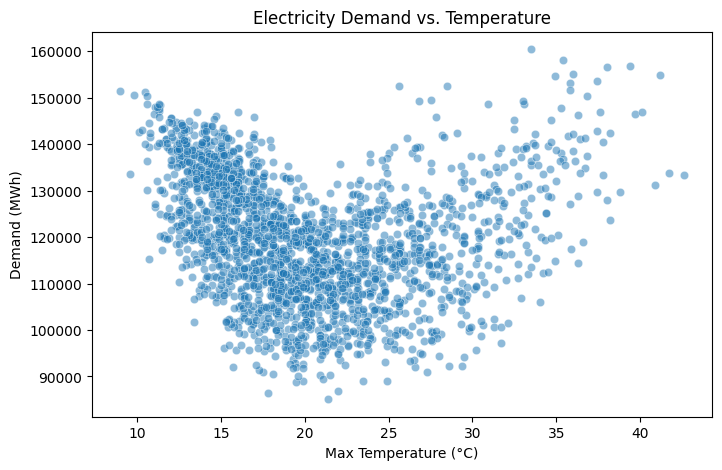

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["max_temperature"], y=df["demand"], alpha=0.5)
plt.title("Electricity Demand vs. Temperature")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Demand (MWh)")
plt.show()

# The demand of electricity is high and mostly concentrated when the max temperature is 10-25 degrees Celsius. This might mean during the winter season, the demand for electricity increases particularly due to electric heaters, geysers, etc.

C:\Users\baner\AppData\Local\Temp\ipykernel_30504\3847882209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["school_day"], y=df["demand"], palette="coolwarm")


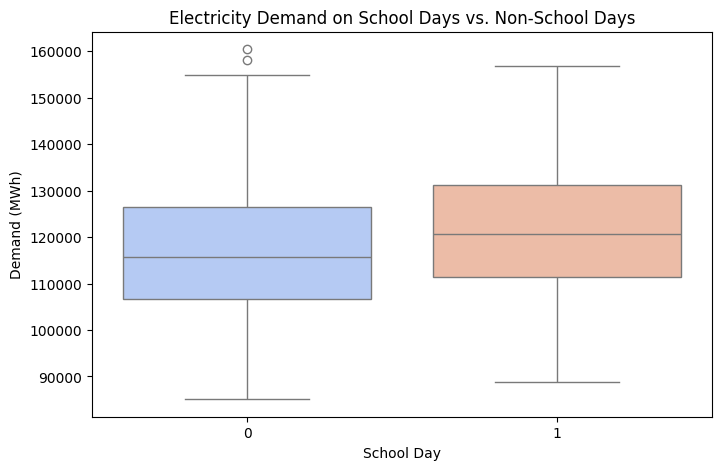

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["school_day"], y=df["demand"], palette="coolwarm")
plt.title("Electricity Demand on School Days vs. Non-School Days")
plt.xlabel("School Day")
plt.ylabel("Demand (MWh)")
plt.show()

# The average of electricity demand is higher when there is a school day for students as compared to when there is a holiday which suggests that educational institutions contribute significantly to energy consumption.

C:\Users\baner\AppData\Local\Temp\ipykernel_30504\3620468583.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["month"], y=df["demand"], ci=None, marker="o")


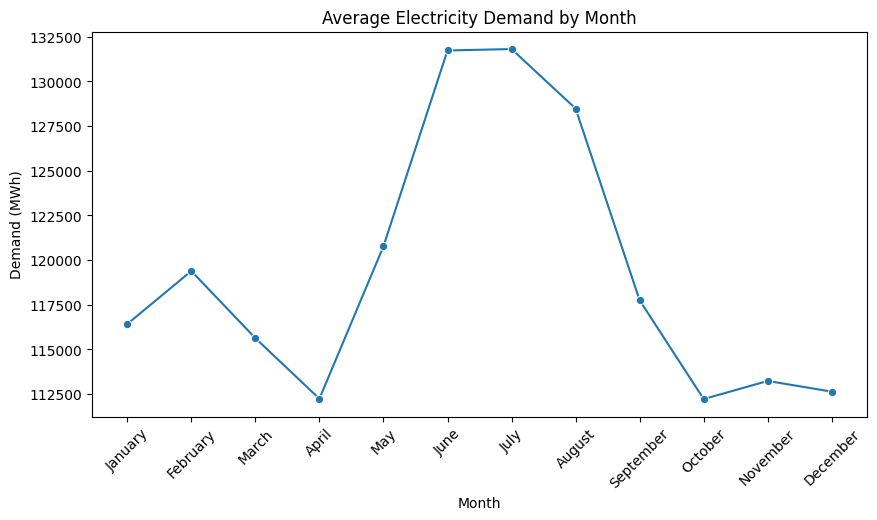

In [19]:
df["month"] = df["date"].dt.month
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["month"], y=df["demand"], ci=None, marker="o")
plt.title("Average Electricity Demand by Month")
plt.xlabel("Month")
plt.ylabel("Demand (MWh)")
plt.xticks(range(1, 13),['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December'], 
           rotation=45)
plt.show()

# The month of June and July has accounted for the most demand of electricity by an average of ~131250 MWh. On the other hand, April and October have recorded the least demand of electricity.
# June and July are peak winter months in Australia. Unlike in the Northern Hemisphere, electricity demand is driven by heating rather than cooling.
# More households and businesses use electric heaters, heat pumps, and electric blankets, leading to increased electricity consumption.
# In winter, days are shorter, meaning people rely more on artificial lighting, contributing to higher demand.

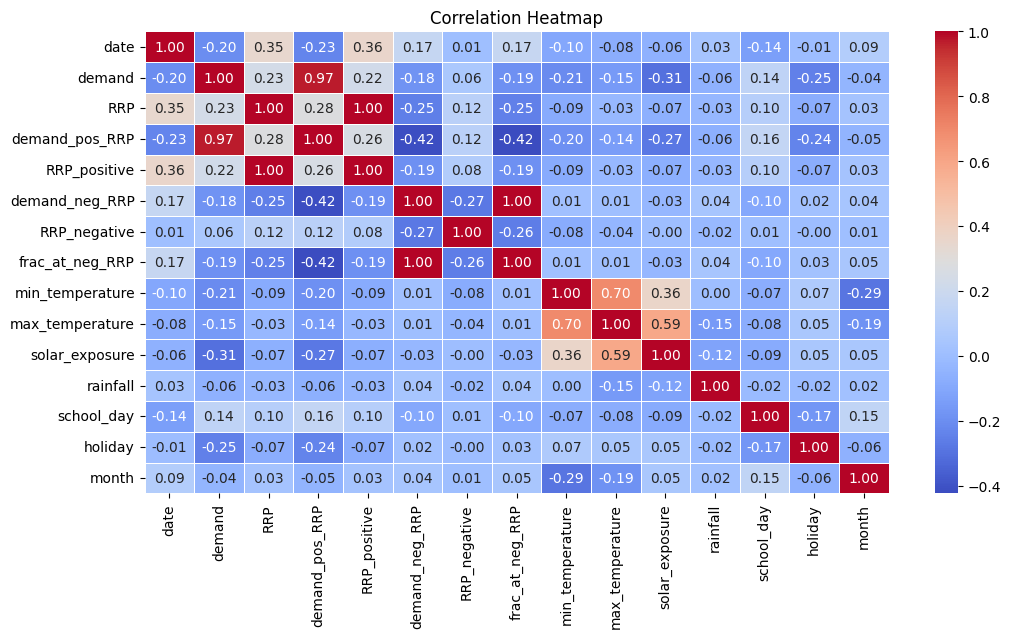

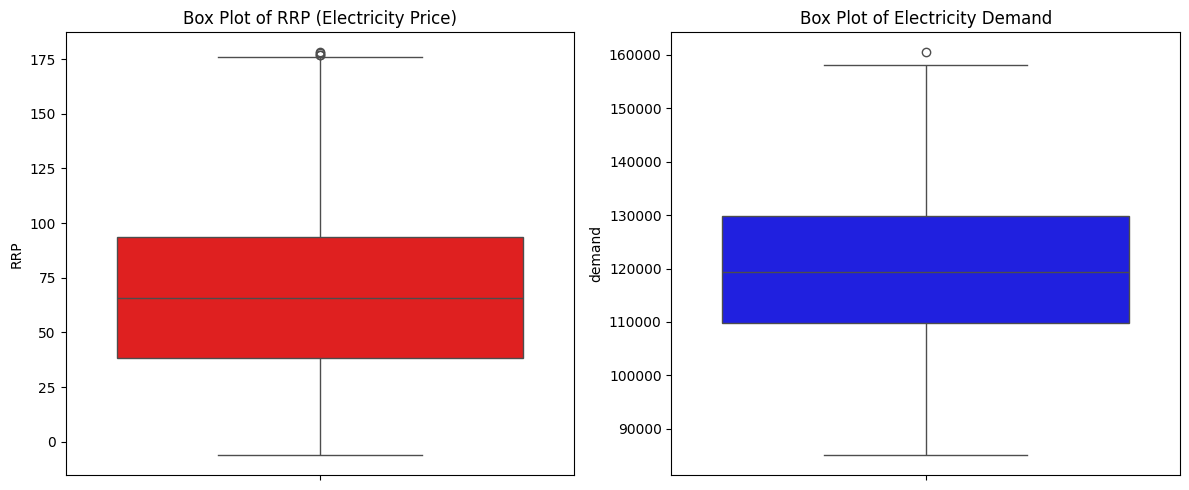

In [20]:
plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Box plots to analyze distribution of RRP and demand
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df["RRP"], ax=axes[0], color="red")
axes[0].set_title("Box Plot of RRP (Electricity Price)")

sns.boxplot(y=df["demand"], ax=axes[1], color="blue")
axes[1].set_title("Box Plot of Electricity Demand")

plt.tight_layout()
plt.show()


# Electricity demand has a strong correlation with temperature and other environmental factors, suggesting weather conditions significantly impact energy consumption. A weaker correlation with price suggests other market dynamics also influence RRP.
# The presence of outliers in the box plots indicates periods of exceptionally high electricity demand and price, which could be due to extreme weather events or economic activity.

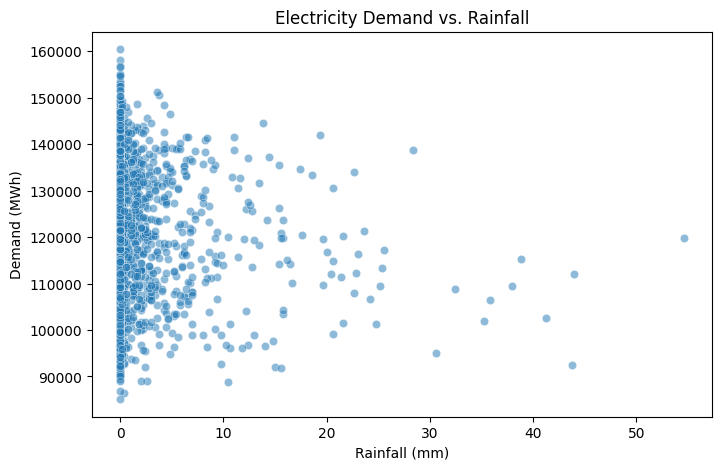

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["rainfall"], y=df["demand"], alpha=0.5)
plt.title("Electricity Demand vs. Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Demand (MWh)")
plt.show()

# When there is absolutely no rainfall (0mm) and if it is between 0-5mm rainfall, the demand is highest.

C:\Users\baner\AppData\Local\Temp\ipykernel_30504\1112526623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=peak_demand_days.index, y=peak_demand_days.values, palette="coolwarm")


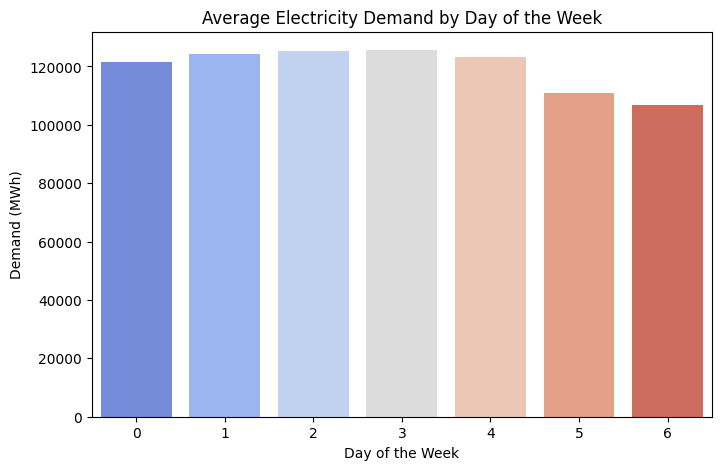

In [22]:
peak_demand_days = df.groupby(df["date"].dt.dayofweek)["demand"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=peak_demand_days.index, y=peak_demand_days.values, palette="coolwarm")
plt.title("Average Electricity Demand by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Demand (MWh)")
plt.show()

# Tuesday and Wednesday are the days where electricity are most in demand.
# The data shows peak demand from Monday to Thursday, which aligns with typical work and school schedules.
# Commercial buildings, offices, and industries operate at full capacity on these days, leading to higher power consumption.
# Saturdays and Sundays have the lowest electricity demand, likely due to:
(i) Reduced industrial and office operations

(ii) Fewer people commuting to work

(iii) Lower electricity usage in commercial spaces like offices and factories

C:\Users\baner\AppData\Local\Temp\ipykernel_30504\1230031165.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values, order=season_order, palette="viridis")


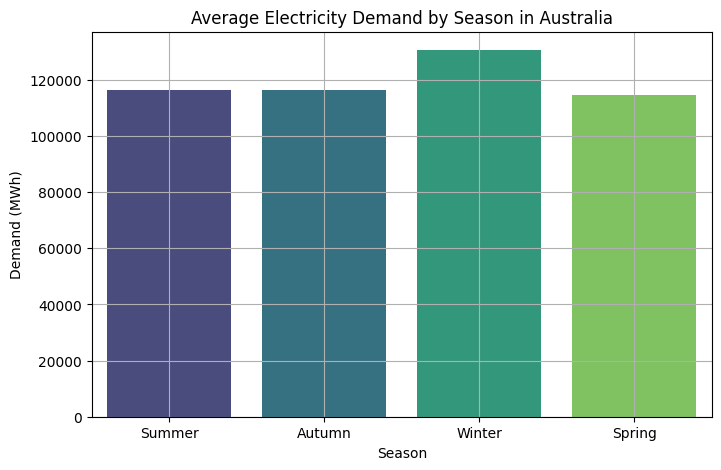

In [23]:
def get_season(month):
    if month in [12, 1, 2]:  
        return "Summer"
    elif month in [3, 4, 5]:  
        return "Autumn"
    elif month in [6, 7, 8]:  
        return "Winter"
    else:  # Spring (9, 10, 11)
        return "Spring"

df["season"] = df["date"].dt.month.apply(get_season)

seasonal_demand = df.groupby("season")["demand"].mean()

season_order = ["Summer", "Autumn", "Winter", "Spring"]

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values, order=season_order, palette="viridis")
plt.title("Average Electricity Demand by Season in Australia")
plt.xlabel("Season")
plt.ylabel("Demand (MWh)")
plt.grid()
plt.show()

# Winter (June–August) has the highest electricity demand (~130,699 MWh)
Driven by heating needs, shorter daylight hours, and increased lighting usage.
# Summer (December–February) follows with ~117,629 MWh
High air conditioning usage due to extreme heat.
# Autumn (March–May) and Spring (September–November) have the lowest demand (~116,456 MWh and ~114,574 MWh, respectively)
Milder weather reduces heating and cooling needs. 

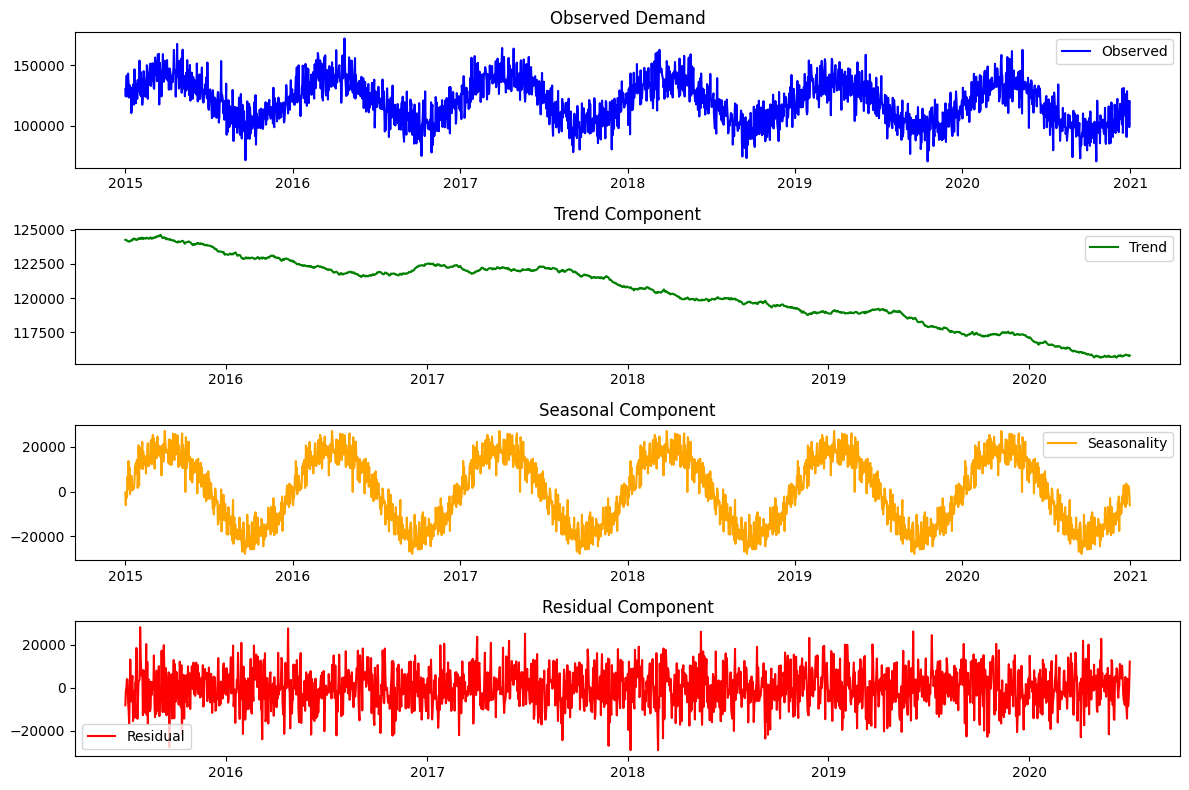

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

np.random.seed(42)
date_rng = pd.date_range(start='1/1/2015', end='12/31/2020', freq='D')
trend = np.linspace(125000, 115000, len(date_rng))  # Declining trend
seasonality = 20000 * np.sin(2 * np.pi * date_rng.dayofyear / 365)  # Seasonal pattern
noise = np.random.normal(0, 10000, len(date_rng))  # Random noise
observed = trend + seasonality + noise  # Combined time series

data = pd.DataFrame({'Date': date_rng, 'Observed': observed})
data.set_index('Date', inplace=True)

result = seasonal_decompose(data['Observed'], model='additive', period=365)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Observed'], color='blue', label='Observed')
plt.legend()
plt.title('Observed Demand')

plt.subplot(4, 1, 2)
plt.plot(result.trend, color='green', label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, color='orange', label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, color='red', label='Residual')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()


# Trend Component: Electricity demand is decreasing over time, which is good. More energy-efficient appliances and industrial processes may have reduced electricity demand over time. Increased use of solar panels and alternative energy sources might have decreased dependency on the electricity grid. The sharp decline near 2020 could be due to lockdowns and business closures, reducing electricity consumption significantly.
# Seasonal Component: Peaks in winter and summer, confirming demand is temperature-driven.
# Residual Component: Represents unpredictable factors like blackouts, economic fluctuations, or unexpected weather events.





# Solutions
Introduce incentives for consumers to reduce usage during peak hours (e.g., dynamic pricing, off-peak discounts).

Invest in large-scale energy storage to handle sudden demand spikes without price surges.

Increase reliance on solar and wind energy during high-demand periods to reduce dependency on expensive non-renewable sources.

Implement AI/ML models to forecast demand and adjust pricing dynamically to prevent extreme price spikes.

Encourage energy-efficient heating and cooling solutions (e.g., insulation, smart thermostats) to reduce excessive seasonal spikes.

Schools should switch to energy-efficient lighting and solar panels to help offset peak-hour electricity usage. Lab sessions, sports activities, and other energy-intensive operations can be scheduled during non-peak hours to distribute demand more evenly.


# Further Preprocessing using AdFuller and KPSS

In [25]:
from statsmodels.tsa.stattools import adfuller, kpss

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Create new features
if 'max_temperature' in df.columns and 'min_temperature' in df.columns:
    df['temperature_range'] = df['max_temperature'] - df['min_temperature']
    df['avg_temperature'] = (df['max_temperature'] + df['min_temperature']) / 2

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    return {'ADF Statistic': result[0], 'p-value': result[1]}

# Function to perform KPSS test
def kpss_test(series):
    result = kpss(series.dropna(), regression='c', nlags='auto')
    return {'KPSS Statistic': result[0], 'p-value': result[1]}

if 'demand' in df.columns:
    adf_results = adf_test(df['demand'])
    kpss_results = kpss_test(df['demand'])
    print("ADF Test Results:", adf_results)
    print("KPSS Test Results:", kpss_results)

print(df.head())

ADF Test Results: {'ADF Statistic': -3.5381975404576798, 'p-value': 0.0070586110728002955}
KPSS Test Results: {'KPSS Statistic': 1.064190719856579, 'p-value': 0.01}
        date      demand        RRP  demand_pos_RRP  RRP_positive  \
0 2015-01-01   99635.030  25.633696       97319.240     26.415953   
1 2015-01-02  129606.010  33.138988      121082.015     38.837661   
2 2015-01-03  142300.540  34.564855      142300.540     34.564855   
3 2015-01-04  104330.715  25.005560      104330.715     25.005560   
4 2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   ma

C:\Users\baner\AppData\Local\Temp\ipykernel_30504\1019479537.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags='auto')


# Using the Prophet model for model training (with external regressors)

18:55:38 - cmdstanpy - INFO - Chain [1] start processing
18:55:39 - cmdstanpy - INFO - Chain [1] done processing


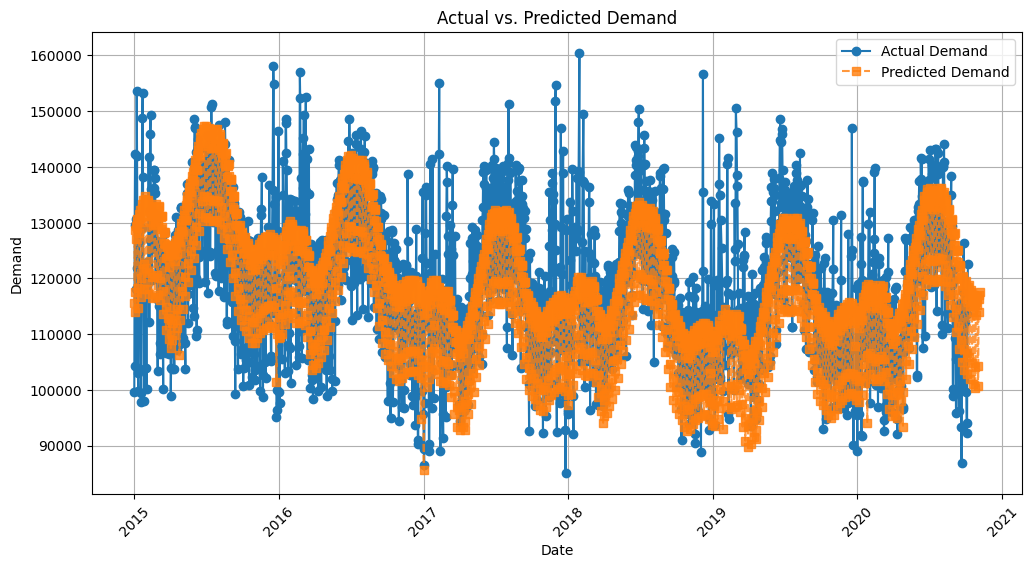

In [37]:
from prophet import Prophet
df = df.rename(columns={"date": "ds", "demand": "y"})
df = df[["ds", "y", "min_temperature", "max_temperature", "solar_exposure", "RRP", "school_day"]]

# Using Prophet Model
model = Prophet()
model.add_country_holidays(country_name='AU')

# Adding external regressors
model.add_regressor('min_temperature')
model.add_regressor('max_temperature')
model.add_regressor('solar_exposure')
model.add_regressor('RRP')
model.add_regressor('school_day')
model.fit(df)

future=model.make_future_dataframe(periods=30)
future["min_temperature"] = df["min_temperature"].iloc[-1]
future["max_temperature"] = df["max_temperature"].iloc[-1]
future["solar_exposure"] = df["solar_exposure"].iloc[-1]
future["RRP"] = df["RRP"].iloc[-1]
future["school_day"] = df["school_day"].iloc[-1]
forecast=model.predict(future)

plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="Actual Demand", marker='o', linestyle="-")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Demand", marker='s', linestyle="--", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Actual vs. Predicted Demand")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
actual_demand = df[df['ds'].isin(forecast['ds'])]['y']
predicted_demand = forecast[forecast['ds'].isin(df['ds'])]['yhat']
mae = mean_absolute_error(actual_demand, predicted_demand)
rmse = np.sqrt(mean_squared_error(actual_demand, predicted_demand))
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 6630.23290277164
Root Mean Squared Error (RMSE): 8812.148999177774


# The MAE is 6630.23 and the RMSE is 8812.149

# Prophet model without external regressors

18:56:52 - cmdstanpy - INFO - Chain [1] start processing
18:56:52 - cmdstanpy - INFO - Chain [1] done processing


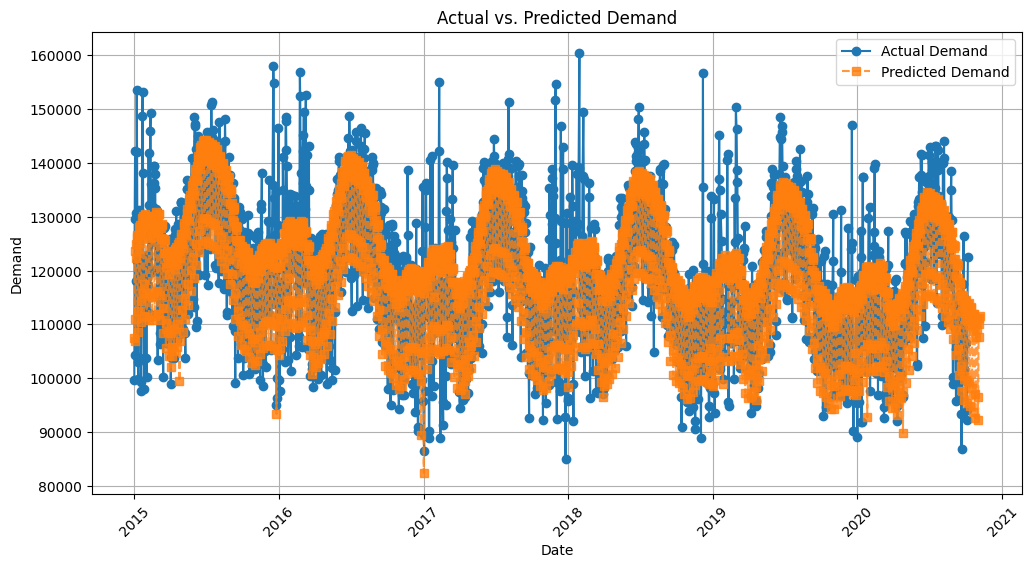

In [39]:
# Prepare the dataframe
df = df.rename(columns={"date": "ds", "demand": "y"})
df = df[["ds", "y"]]  # Only keep date and demand columns

# Using Prophet Model
model = Prophet()
model.add_country_holidays(country_name='AU')

# Fit the model
model.fit(df)

# Make future dataframe
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="Actual Demand", marker='o', linestyle="-")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Demand", marker='s', linestyle="--", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Actual vs. Predicted Demand")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
actual_demand = df[df['ds'].isin(forecast['ds'])]['y']
predicted_demand = forecast[forecast['ds'].isin(df['ds'])]['yhat']
mae = mean_absolute_error(actual_demand, predicted_demand)
rmse = np.sqrt(mean_squared_error(actual_demand, predicted_demand))
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 5706.834477897257
Root Mean Squared Error (RMSE): 7761.194496025924


# The MAE is reduced to 5706.8344 and the RMSE is also reduced to 7761.194. This unusual feature might indicate that the model accuracy did not improve when external regressors were added. This could be due to overfitting or noise in the data.